In [22]:
import pandas as pd
df = pd.read_csv('rec_73-75.csv')
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1
0,1974Q1,Jim Croce,1.0,False,1.0,1,Time In A Bottle,8.0,5682.353
1,1974Q1,The Steve Miller Band,4.0,False,2.0,2,The Joker,12.0,5682.353
2,1974Q1,Helen Reddy,3.0,False,3.0,3,Leave Me Alone (ruby Red Dress),10.0,5682.353
3,1974Q1,Charlie Rich,2.0,False,1.0,4,The Most Beautiful Girl,15.0,5682.353
4,1974Q1,Al Wilson,8.0,False,5.0,5,Show And Tell,12.0,5682.353
...,...,...,...,...,...,...,...,...,...
3870,1975Q1,Ohio Players,NaN,NaN,NaN,96,Fire,NaN,5551.713
3871,1975Q1,Mud,NaN,NaN,NaN,97,Oh Boy,NaN,5551.713
3872,1975Q1,Linda Ronstadt,NaN,NaN,NaN,98,When Will I Be Loved?,NaN,5551.713
3873,1975Q1,Sweet Sensation,NaN,NaN,NaN,99,Sad Sweet Dreamer,NaN,5551.713


In [23]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss
0,1974Q1,Jim Croce,1.0,False,1.0,1,Time In A Bottle,8.0,5682.353,0.0
1,1974Q1,The Steve Miller Band,4.0,False,2.0,2,The Joker,12.0,5682.353,2.0
2,1974Q1,Helen Reddy,3.0,False,3.0,3,Leave Me Alone (ruby Red Dress),10.0,5682.353,0.0
3,1974Q1,Charlie Rich,2.0,False,1.0,4,The Most Beautiful Girl,15.0,5682.353,-2.0
4,1974Q1,Al Wilson,8.0,False,5.0,5,Show And Tell,12.0,5682.353,3.0
...,...,...,...,...,...,...,...,...,...,...
3670,1975Q1,Benny Bell,55.0,False,45.0,45,Shaving Cream,5.0,5551.713,10.0
3671,1975Q1,Kraftwerk,64.0,False,46.0,46,Autobahn,4.0,5551.713,18.0
3672,1975Q1,Carpenters,74.0,False,47.0,47,Only Yesterday,2.0,5551.713,27.0
3673,1975Q1,Gladys Knight And The Pips,51.0,False,48.0,48,Love Finds It's Own Way,7.0,5551.713,3.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="rank_gain/loss")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

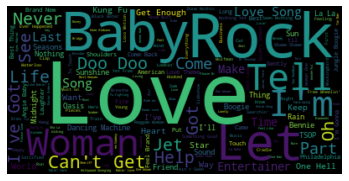

In [25]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.track_title)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [26]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

C:\Users\java\AppData\Local\Temp\ipykernel_5056\701095560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,date,track_artist,track_lp,track_new,track_pp,track_rank,track_title,track_weeks,GDPC1,rank_gain/loss,sentiment
1,1974Q1,The Steve Miller Band,4.0,False,2.0,2,The Joker,12.0,5682.353,2.0,1
3,1974Q1,Charlie Rich,2.0,False,1.0,4,The Most Beautiful Girl,15.0,5682.353,-2.0,-1
4,1974Q1,Al Wilson,8.0,False,5.0,5,Show And Tell,12.0,5682.353,3.0,1
5,1974Q1,Brownsville Station,9.0,False,6.0,6,Smokin' In The Boy's Room,11.0,5682.353,3.0,1
6,1974Q1,Elton John,5.0,False,2.0,7,Goodbye Yellow Brick Road,11.0,5682.353,-2.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
3670,1975Q1,Benny Bell,55.0,False,45.0,45,Shaving Cream,5.0,5551.713,10.0,1
3671,1975Q1,Kraftwerk,64.0,False,46.0,46,Autobahn,4.0,5551.713,18.0,1
3672,1975Q1,Carpenters,74.0,False,47.0,47,Only Yesterday,2.0,5551.713,27.0,1
3673,1975Q1,Gladys Knight And The Pips,51.0,False,48.0,48,Love Finds It's Own Way,7.0,5551.713,3.0,1


In [28]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

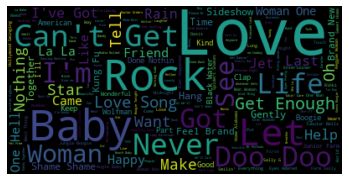

In [29]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

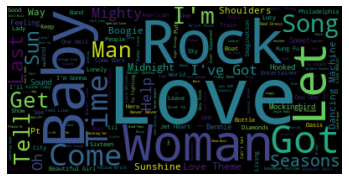

In [30]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [31]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

C:\Users\java\AppData\Local\Temp\ipykernel_5056\1108073838.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\java\AppData\Local\Temp\ipykernel_5056\1108073838.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df['track_title'].value_counts()[:8]

One Hell Of A Woman       22
Dancing Machine           20
The Entertainer           19
Midnight At The Oasis     19
Come And Get Your Love    19
Jungle Boogie             18
Sideshow                  18
Rock On                   18
Name: track_title, dtype: int64

In [33]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

C:\Users\java\AppData\Local\Temp\ipykernel_5056\3186846728.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

,track_title,sentiment
1,The Joker,1
3,The Most Beautiful Girl,-1
4,Show And Tell,1
5,Smokin' In The Boy's Room,1
6,Goodbye Yellow Brick Road,-1


In [35]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions = lr.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 37,  30],
       [219, 467]], dtype=int64)

In [42]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.14      0.55      0.23        67
           1       0.94      0.68      0.79       686

    accuracy                           0.67       753
   macro avg       0.54      0.62      0.51       753
weighted avg       0.87      0.67      0.74       753

